#  Heart Disease Prediction: Machine Learning for Good

## 1. Group Members
Xiaoxuan Liu xl2590
Yeqian Yang  yy1240

## 2. Introduction
### Description of Problem

### Motivation and Background
According to the Centers for Disease Control and Prevention, heart disease is the leading cause of death for people of most ethnicities in the United States. About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths. Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a ﬁrst heart attack and 210,000 happen in people who have already had a heart attack. In this project, we plan to use data mining techniques to understand the relevant causes of heart disease and exploit machine learning algorithms to predict it. Better prediction hopefully leads to better prevention of heart disease

## 3. Reference
[1] Weng, Stephen F., et al. "Can machine-learning improve cardiovascular risk prediction using routine clinical data?." PloS one 12.4 (2017): e0174944. 

[2] Gonsalves, Amanda H., et al. "Prediction of Coronary Heart Disease using Machine Learning: An Experimental Analysis." Proceedings of the 2019 3rd International Conference on Deep Learning Technologies. ACM, 2019.
1

[3] Dinesh, Kumar G., et al. "Prediction of Cardiovascular Disease Using Machine Learning Algorithms." 2018 International Conference on Current Trends towards Converging Technologies (ICCTCT). IEEE, 2018. 

[4] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html 

[5] https://www.cdc.gov/heartdisease/facts.htm [6] https://archive.ics.uci.edu/ml/index.php


## 4. Description of Methodology
In this project, we plan to use the clinical data obtained from the Cleveland, Hungarian, Switzerland,Long Beach VA heart disease database (UCI machine Learning Repository).[6] These datasets segregate the patterns possibly related to the heart disease. We’ll ﬁrst perform data processing such as data cleaning, data integration and deal with missing values. Then we’ll conduct statistical analysis of the datasets to better understand the distribution of the data and select relevant features. Finally we’ll implement several machine learning models to compare the prediction accuracy of these models so that we can ﬁnd the most suitable model with the best performance.


## 5.  Experiments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import os

### 5.1 Dataset Description 
The raw datasets we use are from UCI Machine Learning Repository, and the heart disease datasets are separated into several sub sets from diﬀerent region’s hospitals(cleveland.data, hungarian.data, switzerland.data and long-beach-va.data, heart-disease.names). 
这里要改~~

The description of dataset, for each column
 1. age: age in years
 2. sex: sex (1 = male; 0 = female)
 3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
 5. chol: serum cholestoral in mg/dl
 6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
 7. restecg: resting electrocardiographic results 
         -- Value 0: normal 
         -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV) 
         -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
 8. thaldur: duration of exercise test in minutes
 9. exang: exercise induced angina (1 = yes; 0 = no)
 10. oldpeak = ST depression induced by exercise relative to rest
 11. slope: the slope of the peak exercise ST segment
         -- Value 1: upsloping
         -- Value 2: flat
         -- Value 3: downsloping
 12. ca: number of major vessels (0-3) colored by flourosopy
 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
 14. num: diagnosis of heart disease (angiographic disease status)
         -- Value 0: < 50% diameter narrowing
         -- Value 1: > 50% diameter narrowing
     (in any major vessel: attributes 59 through 68 are vessels)

In [2]:
# the dataset from all three places
df = pd.read_csv("data/All_data_total_without_last_two.csv")

def trans(data):
    if data >= 1:
        return 1
    else:
        return 0
    
df['target'] = df['target'].map(lambda x : trans(x))
print(df.head(20))
print(df.target.value_counts())

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   1       145   233    1        2      150      0      2.3   
1    67    1   4       160   286    0        2      108      1      1.5   
2    67    1   4       120   229    0        2      129      1      2.6   
3    37    1   3       130   250    0        0      187      0      3.5   
4    41    0   2       130   204    0        2      172      0      1.4   
5    56    1   2       120   236    0        0      178      0      0.8   
6    62    0   4       140   268    0        2      160      0      3.6   
7    57    0   4       120   354    0        0      163      1      0.6   
8    63    1   4       130   254    0        2      147      0      1.4   
9    53    1   4       140   203    1        2      155      1      3.1   
10   57    1   4       140   192    0        0      148      0      0.4   
11   56    0   2       140   294    0        2      153      0      1.3   
12   56    1   3       13

### 5.2 Data Analysis

#### The precentage of the heart disease 


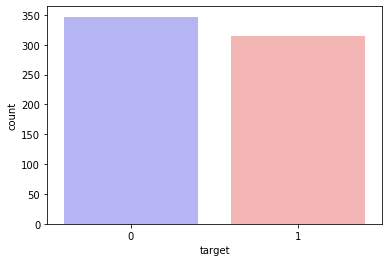

Percentage of Patients Haven't Heart Disease: 52.50%
Percentage of Patients Have Heart Disease: 47.50%


In [3]:
"""
precentage of the heart disease
x label is for the count of people 
"""
if 'target' in df.columns:
    sns.countplot(x="target", data=df, palette="bwr", color = ['lightsteelblue', 'cornflowerblue'])
    plt.show()
    count_No_Disease = len(df[df.target == 0])
    count_Have_Disease = len(df[df.target >= 1])
    print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((count_No_Disease / (len(df.target))*100)))
    print("Percentage of Patients Have Heart Disease: {:.2f}%".format((count_Have_Disease / (len(df.target))*100)))

#### The precentage of female and male

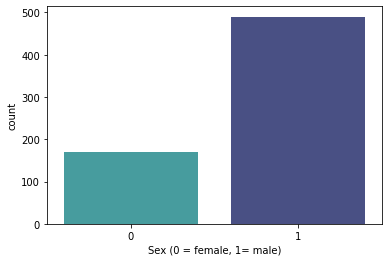

Percentage of Female Patients: 25.87%
Percentage of Male Patients: 74.13%


In [4]:
"""
precentage of female and male
x label is for the count of people
"""
if 'sex' in df.columns:
    sns.countplot(x='sex', data=df, palette="mako_r", color = ['blue','darkblue'])
    plt.xlabel("Sex (0 = female, 1= male)")
    plt.show()
        
    count_Female = len(df[df.sex == 0])
    count_Male = len(df[df.sex == 1])
    print("Percentage of Female Patients: {:.2f}%".format((count_Female / (len(df.sex))*100)))
    print("Percentage of Male Patients: {:.2f}%".format((count_Male / (len(df.sex))*100)))

#### Heart disease with age

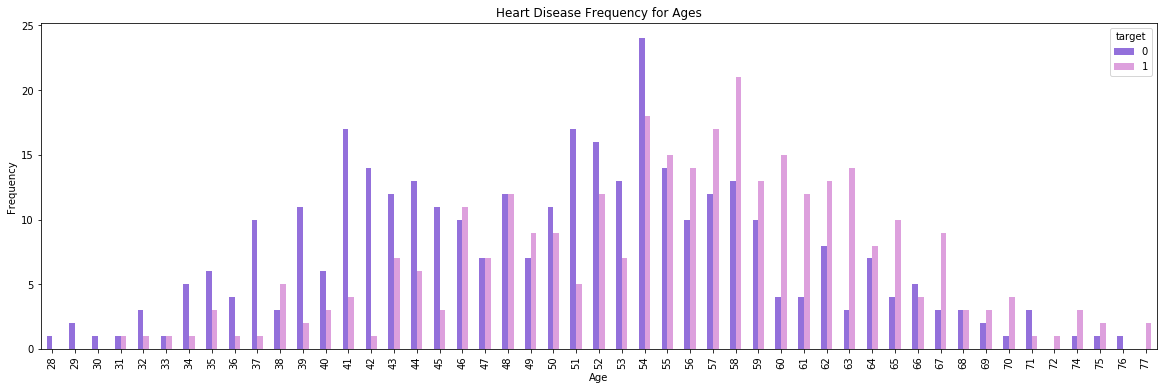

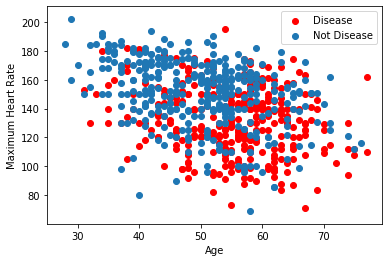

In [5]:
"""
heart disease with the age
"""
if 'age' in df.columns and 'target' in df.columns:
    pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6), color = ['mediumpurple','plum'])
    plt.title('Heart Disease Frequency for Ages')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.savefig('heartDiseaseAndAges.png')
    plt.show()

    
""" 
relation with disease and age 
scatter plot with age range and the different maximum heart rate
red one is for disease and blue is for non disease
see the correlation with heart rate and disease 
"""
if 'age' in df.columns and 'target' in df.columns:
    plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
    plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
    plt.legend(["Disease", "Not Disease"])
    plt.xlabel("Age")
    plt.ylabel("Maximum Heart Rate")
    plt.show()

#### Heart disease with sex

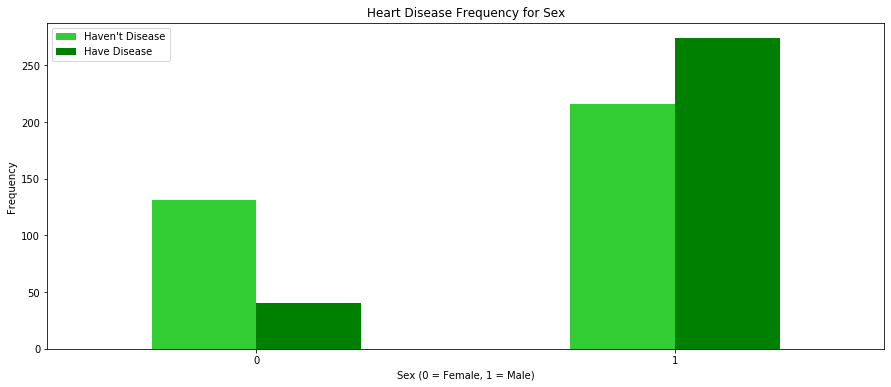

In [6]:
"""
heart disease with the sex
seprate the people and the disease 
"""
if 'sex' in df.columns and 'target' in df.columns:
    pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['limegreen','green' ])
    plt.title('Heart Disease Frequency for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.xticks(rotation=0)
    plt.legend(["Haven't Disease", "Have Disease"])
    plt.ylabel('Frequency')
    plt.show()

In [7]:
if 'slope' in df.columns and 'target' in df.columns:
    pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['orange','moccasin' ])
    plt.title('Heart Disease Frequency for Slope')
    plt.xlabel('The Slope of The Peak Exercise ST Segment ')
    plt.xticks(rotation = 0)
    plt.ylabel('Frequency')
    plt.show()
    

#### Blood sugar with disease

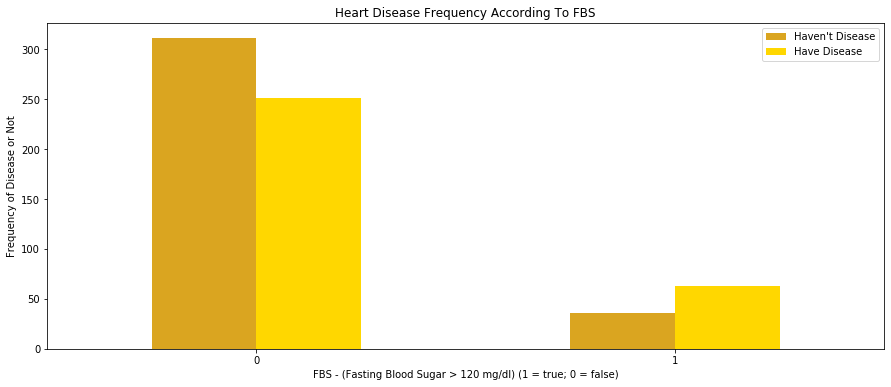

In [8]:
"""
Fasting Blood Sugar with disease
to see whether fasting blood suger will influence the people have disease
"""    
if 'fbs' in df.columns and 'target' in df.columns:
    pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['goldenrod','gold' ])
    plt.title('Heart Disease Frequency According To FBS')
    plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
    plt.xticks(rotation = 0)
    plt.legend(["Haven't Disease", "Have Disease"])
    plt.ylabel('Frequency of Disease or Not')
    plt.show()

#### Pain type with disease

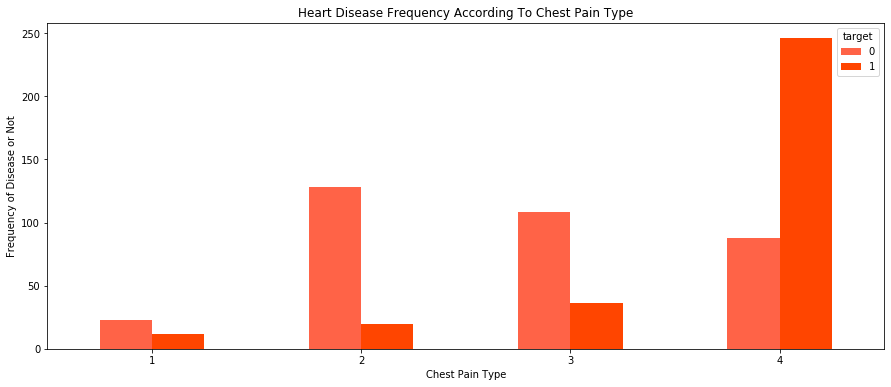

In [9]:
"""
Chest Pain Type with disease
to see whether different chest type will influence the people have disease
"""
if 'cp' in df.columns and 'target' in df.columns:
    pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['tomato','orangered' ])
    plt.title('Heart Disease Frequency According To Chest Pain Type')
    plt.xlabel('Chest Pain Type')
    plt.xticks(rotation = 0)
    plt.ylabel('Frequency of Disease or Not')
    plt.show()

### 5.2 Implement Machine Learning Model

#### Create training data and testing data

In [10]:
# split the training dataset testing dataset
def data_for_model(df):
    """
    change some categorical vars to dummy var
    """
    a = pd.get_dummies(df['cp'], prefix = "cp")
    b = pd.get_dummies(df['thal'], prefix = "thal")
    c = pd.get_dummies(df['slope'], prefix = "slope")
    frames = [df, a, b, c]
    df = pd.concat(frames, axis = 1)
    
    df = df.drop(columns = ['cp', 'thal', 'slope'])
    
    y = df.target.values
    x_data = df.drop(['target'], axis = 1)
    # Normalize
    x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
    #transpose matrices
    x_train = x_train.T
    y_train = y_train.T
    x_test = x_test.T
    y_test = y_test.T
    
    print(x_train.shape)
    return x_train,y_train, x_test, y_test


def initialize(dimension):
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head


def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients


def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [11]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction



def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

#### import the dataset using for machine learning model

In [12]:
# the dataset only from cleverland
df = pd.read_csv("data/All_data_total.csv")

def trans(data):
    if data >= 1:
        return 1
    else:
        return 0
    
df['target'] = df['target'].map(lambda x : trans(x))
print(df.head(20))
print(df.target.value_counts())


    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   1       145   233    1        2      150      0      2.3   
1    67    1   4       160   286    0        2      108      1      1.5   
2    67    1   4       120   229    0        2      129      1      2.6   
3    37    1   3       130   250    0        0      187      0      3.5   
4    41    0   2       130   204    0        2      172      0      1.4   
5    56    1   2       120   236    0        0      178      0      0.8   
6    62    0   4       140   268    0        2      160      0      3.6   
7    57    0   4       120   354    0        0      163      1      0.6   
8    63    1   4       130   254    0        2      147      0      1.4   
9    53    1   4       140   203    1        2      155      1      3.1   
10   57    1   4       140   192    0        0      148      0      0.4   
11   56    0   2       140   294    0        2      153      0      1.3   
12   56    1   3       13

In [13]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
    
df = df.drop(columns = ['cp', 'thal', 'slope'])
    
y = df.target.values
x_data = df.drop(['target'], axis = 1)
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
    
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

 1. age: age in years
 2. sex: sex (1 = male; 0 = female)
 3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
 5. chol: serum cholestoral in mg/dl
 6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
 7. restecg: resting electrocardiographic results 
         -- Value 0: normal 
         -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV) 
         -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
 8. thaldur: duration of exercise test in minutes
 9. exang: exercise induced angina (1 = yes; 0 = no)
 10. oldpeak = ST depression induced by exercise relative to rest
 11. slope: the slope of the peak exercise ST segment
         -- Value 1: upsloping
         -- Value 2: flat
         -- Value 3: downsloping
 12. ca: number of major vessels (0-3) colored by flourosopy
 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
 14. num: diagnosis of heart disease (angiographic disease status)
         -- Value 0: < 50% diameter narrowing
         -- Value 1: > 50% diameter narrowing
     (in any major vessel: attributes 59 through 68 are vessels)

In [14]:
x_train

,173,253,220,196,5,33,303,34,228,146,...,242,277,211,9,195,251,192,117,47,172
age,0.729167,0.291667,0.520833,0.333333,0.562500,0.625000,0.583333,0.312500,0.770833,0.250000,...,0.666667,0.604167,0.250000,0.500000,0.833333,0.729167,0.687500,0.708333,0.437500,0.687500
sex,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
trestbps,0.481132,0.198113,0.132075,0.415094,0.245283,0.386792,0.433962,0.339623,0.169811,0.169811,...,0.377358,0.339623,0.339623,0.433962,0.622642,0.320755,0.415094,0.339623,0.528302,0.433962
chol,0.241379,0.437500,0.359914,0.293103,0.293103,0.288793,0.245690,0.286638,0.241379,0.323276,...,0.288793,0.209052,0.245690,0.221983,0.288793,0.351293,0.418103,0.495690,0.308190,0.633621
fbs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
restecg,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
thalach,0.465649,0.839695,0.732824,0.618321,0.816794,0.687023,0.557252,0.824427,0.465649,0.824427,...,0.564885,0.458015,0.740458,0.641221,0.458015,0.259542,0.267176,0.465649,0.435115,0.656489
exang,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
oldpeak,0.322581,0.193548,0.000000,0.032258,0.129032,0.080645,0.322581,0.064516,0.016129,0.000000,...,0.419355,0.096774,0.322581,0.500000,0.016129,0.032258,0.306452,0.290323,0.419355,0.193548
cp_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
y_train

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

#### Get the mean value of several features

In [16]:
df.groupby('target').mean()
print(df.groupby('target').mean())

              age       sex    trestbps        chol       fbs   restecg  \
target                                                                    
0       52.544379  0.579882  129.165680  244.372781  0.142012  0.816568   
1       56.396104  0.811688  134.798701  250.909091  0.142857  1.110390   

           thalach     exang   oldpeak      cp_1      cp_2      cp_3  \
target                                                                 
0       158.035503  0.159763  0.610651  0.094675  0.242604  0.420118   
1       137.032468  0.577922  1.594805  0.045455  0.064935  0.116883   

            cp_4    thal_3    thal_6    thal_7   slope_1   slope_2   slope_3  
target                                                                        
0       0.242604  0.786982  0.041420  0.171598  0.627219  0.313609  0.059172  
1       0.772727  0.240260  0.103896  0.655844  0.246753  0.662338  0.090909  


#### Logistic Regression 
100 iterations, the test acc will be 0.83 

1000 iterations, the test acc will decrease to 0.80 

10000 iterations, the test acc will be lower than before

iteration: 100
cost: 0.3785938955278798


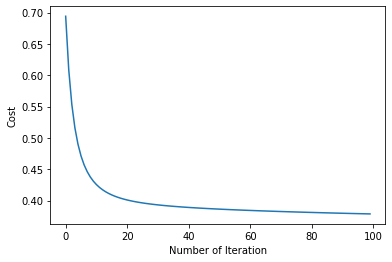

Manuel Test Accuracy: 83.08%
iteration: 1000
cost: 0.35997109340489086


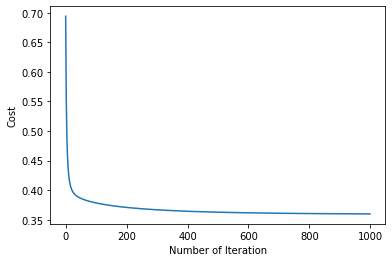

Manuel Test Accuracy: 80.00%
iteration: 10000
cost: 0.35931561757886094


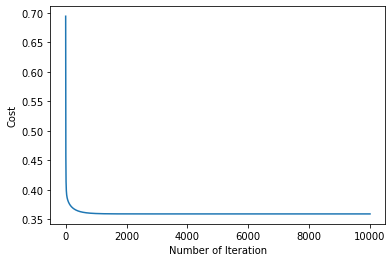

Manuel Test Accuracy: 78.46%


In [17]:
"""logistic regression """
logistic_regression(x_train,y_train,x_test,y_test,1,100)
logistic_regression(x_train,y_train,x_test,y_test,1,1000)
logistic_regression(x_train,y_train,x_test,y_test,1,10000)

#### KNN machine learning model 

Fitting with range 1 to 20 neighbors 

The top acc will be 9 neightbors with 0.8615

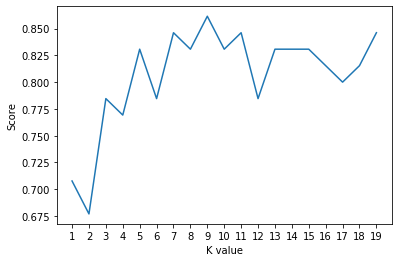

Maximum KNN Score is 86.15%


In [18]:
#try ro find best k value
scoreList = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(x_train.T, y_train.T)
    scoreList.append(knn.score(x_test.T, y_test.T))
accuracies = {} 
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
    
acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

#### SVM machine learning model 


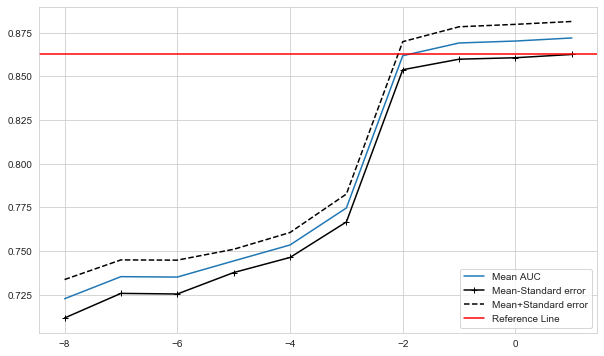

0.8625354660770173
85.18518518518519


"\nsvm = SVC(random_state = 1)\nsvm.fit(x_train.T, y_train.T)\n    \nacc = svm.score(x_test.T,y_test.T)*100\naccuracies['SVM'] = acc\n"

In [44]:
"""SVM """
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model,svm
from sklearn import metrics
from scipy.stats import sem
import matplotlib.pyplot as plt
aucs=dict()
cs = np.logspace(-8,1,10,base=10).astype(float)
acc_score = []
for f in range(10):
    x_train,x_test=train_test_split(df)
    #print(x_test)
    for c in cs:
        svm_clf = svm.SVC(C=c, kernel="linear")
        svm_clf.fit(x_train.drop('target',1), x_train['target'])
        svm_predict = svm_clf.decision_function(x_test.drop('target',1))
        #print(svm_predict)
       
        auc_c = roc_auc_score(x_test["target"], svm_predict)
        if c in aucs:
            aucs[c].append(auc_c)
        else:
            aucs[c] = [auc_c] 
            
        acc = svm_clf.score(x_test.drop('target',1), x_test["target"])*100

        acc_score.append(acc)
#print(aucs)
#print(acc_score)


auc_mean = list()
sauc_std = list()
auc_max = list()
for i in aucs.keys():
    mean = np.mean(aucs[i])
    auc_mean.append(mean)
    std = sem(aucs[i])
    sauc_std.append(std)
    max_auc = mean - std
    auc_max.append(max_auc)

plt.figure(figsize=(10,6))
plt.plot(np.log10(cs),auc_mean,label='Mean AUC')
plt.plot(np.log10(cs),np.array(auc_mean)-np.array(sauc_std),'k+-',label='Mean-Standard error')
plt.plot(np.log10(cs),np.array(auc_mean)+np.array(sauc_std),'k--',label='Mean+Standard error')
plt.axhline(y=max(auc_max),color='r',label='Reference Line')
plt.legend(loc='lower right')
plt.show()
print(max(auc_max))

max_acc = max(acc_score)
print(max_acc)
"""
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)
    
acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
"""
#print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))


In [47]:
"""Naive Bayes"""
nb = GaussianNB()
acc_result = []
for f in range(10):
    x_train,x_test=train_test_split(df)
    nb.fit(x_train.drop('target',1), x_train['target'])
    acc = nb.score(x_test.drop('target',1), x_test["target"])*100
    acc_result.append(acc)
max_acc = max(acc_result)
accuracies['Naive Bayes'] = max_acc
print("Accuracy of Naive Bayes: {:.2f}%".format(max_acc))

Accuracy of Naive Bayes: 88.89%


In [48]:
"""Decision tree"""
dtc = DecisionTreeClassifier()
acc_result = []
for f in range(10):
    x_train,x_test=train_test_split(df)
    dtc.fit(x_train.drop('target',1), x_train['target'])
    acc = dtc.score(x_test.drop('target',1), x_test["target"])*100
    acc_result.append(acc)
max_acc = max(acc_result)
accuracies['Decision Tree'] = max_acc
print("Decision Tree Test Accuracy {:.2f}%".format(max_acc))

Decision Tree Test Accuracy 82.72%


In [53]:
"""Random forest"""
list_ = [100, 1000, 10000]
acc_result = []
for f in range(10):
    x_train,x_test=train_test_split(df)
    
    for n in list_:
        rf = RandomForestClassifier(n_estimators = n, random_state = 1)
        rf.fit(x_train.drop('target',1), x_train['target'])
        acc = rf.score(x_test.drop('target',1), x_test["target"])*100
        acc_result.append(acc)

max_acc = max(acc_result)
accuracies['Random Forest'] = max_acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(max_acc))
    

Random Forest Algorithm Accuracy Score : 85.19%


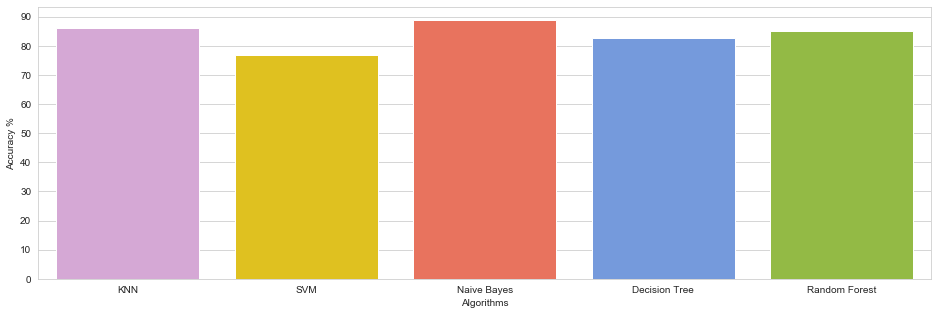

In [54]:
#compare and plot the acc
colors = ["#DDA0DD", "#FFD700", "#FF6347", "#6495ED","#9ACD32","#FA8072"]
    
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()